<a href="https://colab.research.google.com/github/Manojkumar310897/Guvi-Final-projects/blob/main/Wikipedia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Wikipedia-API

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
 !pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=f4388502c56c7a26ff85324ccfc31717862ed8dcecc001a257b7f0703670aa5e
  Stored in directory: /root/.cache/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


In [51]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# load the 'articleDesc.csv' file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/articleDesc.csv', delimiter='@$@')

<ipython-input-4-f753247b09d6>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/articleDesc.csv', delimiter='@$@')


In [5]:
df.head()

,Article Name@$@Vital Article@$@Level@$@Class@$@Importance@$@Topic@$@Wikiproject
0,Population_history_of_ancient_Egypt_Archive_8@...
1,Sin_Mirar_Atrás@$@NA@$@NA@$@NA@$@NA@$@NA
2,RMWFC@$@NA@$@NA@$@NA@$@NA@$@NA
3,Wilbur_E._Colyer@$@NA@$@NA@$@Stub@$@NA@$@['bio...
4,Salmson_B.9@$@NA@$@NA@$@Start@$@NA@$@NA


In [6]:
#Removing the delimiters from the columns
df = df['Article Name@$@Vital Article@$@Level@$@Class@$@Importance@$@Topic@$@Wikiproject'].str.split('@\$@', expand=True)


In [7]:
df.head()

,0,1,2,3,4,5,6,7
0,Population_history_of_ancient_Egypt_Archive_8,NA,NA,NA,NA,NA,None,None
1,Sin_Mirar_Atrás,NA,NA,NA,NA,NA,None,None
2,RMWFC,NA,NA,NA,NA,NA,None,None
3,Wilbur_E._Colyer,NA,NA,Stub,NA,"['biography', 'military history', 'united stat...",None,None
4,Salmson_B.9,NA,NA,Start,NA,NA,None,None


In [8]:
df.columns = ['Article Name', 'Vital Article', 'Level', 'Class', 'Importance', 'Topic', 'Wikiproject','Author']


In [9]:
# Article name and class are only required to Label the articles
df = df[["Article Name", "Class"]]

In [10]:
df.head(10)

,Article Name,Class
0,Population_history_of_ancient_Egypt_Archive_8,NA
1,Sin_Mirar_Atrás,NA
2,RMWFC,NA
3,Wilbur_E._Colyer,Stub
4,Salmson_B.9,Start
5,Campaign_to_Suppress_Bandits_in_northeastern_G...,B
6,Vatun,NA
7,Ralph_Bean,NA
8,Clothilde_of_France,NA
9,USS_Lillian_Anne_(YFB-41),NA


In [11]:
# Filter the dataframe to keep only the rows where Class is equal to "FA"
df1 = df.loc[df['Class'] == 'FA', ['Article Name', 'Class']]
col=['Article Name','Class']
# Print the resulting dataframe
df1=pd.DataFrame(df1,columns=col)

In [12]:
df1.shape

(5388, 2)

In [13]:
# Filter the dataframe to keep only the rows where Class is  not equal to "FA"
df2 = df.loc[(df['Class'] != 'FA') & (df['Class'] != 'NA'), ['Article Name', 'Class']]
col = ['Article Name', 'Class']
df2 = pd.DataFrame(df2, columns=col)

print(df2)

                                              Article Name  Class
3                                         Wilbur_E._Colyer   Stub
4                                              Salmson_B.9  Start
5        Campaign_to_Suppress_Bandits_in_northeastern_G...      B
11                                            Wilfred_Cass   Stub
12                                       Șimian,_Mehedinți   Stub
...                                                    ...    ...
6153243                                        Out_of_Life   Stub
6153245                                          Thamserku   Stub
6153246                                   I_Wanna_Hold_You   Stub
6153248             China_and_the_World_Trade_Organization  Start
6153249                             Jan_de_Vries_(athlete)   Stub

[4307296 rows x 2 columns]


In [14]:
df2.shape

(4307296, 2)

In [15]:
# Randomly sample 5000 rows from the dataset
df3 = df2.sample(n=5000, random_state=42)

# Print the resulting dataframe
print(df3)

                                              Article Name  Class
605754                     1955_Little_League_World_Series   Stub
3118085                                   Alfonso_Calalang   Stub
2348051                                      Västanåfallet  Start
5734245                                      Pseudorealism  Start
5663631                                          Dave_Albo  Start
...                                                    ...    ...
1088053                West_Seneca_East_Senior_High_School   Stub
2997277                                      Kuala_Klawang   Stub
4816529  List_of_Memorial_University_of_Newfoundland_pe...   List
5449893                               Battle_of_73_Easting  Start
1692934               TaylorMade_Pebble_Beach_Invitational  Start

[5000 rows x 2 columns]


In [16]:
#Assigning all other class as NFA
df3.loc[:, 'Class'] = 'NFA'

In [17]:
df3.head()

,Article Name,Class
605754,1955_Little_League_World_Series,NFA
3118085,Alfonso_Calalang,NFA
2348051,Västanåfallet,NFA
5734245,Pseudorealism,NFA
5663631,Dave_Albo,NFA


In [18]:
df = pd.concat([df1, df3])

In [19]:
df.columns

Index(['Article Name', 'Class'], dtype='object')

In [20]:
df.shape

(10388, 2)

EXTRACTING THE FEATURES

In [21]:
#Importing the wikipedia api library
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('en')

In [22]:
import pandas as pd
import wikipediaapi

# Create an empty list to store the title lengths
title_lengths = []

# Loop through the Article Name column
for i in df['Article Name']:
    # Get the Wikipedia page object
    page_py = wiki_wiki.page(i)
    
    # Get the length of the title and append it to the list
    title_lengths.append(len(page_py.title))
    
# Create a new column in the DataFrame for the title lengths
df['Title_lengths'] = title_lengths


In [23]:
df['Title_lengths']

1118       18
2394        8
2402       20
2629        3
3078        7
           ..
1088053    35
2997277    13
4816529    50
5449893    20
1692934    36
Name: Title_lengths, Length: 10388, dtype: int64

In [24]:
import requests

# Define the endpoint for the MediaWiki API
endpoint_url = "https://en.wikipedia.org/w/api.php"

# Define a list to store the text lengths
text_lengths = []

# Loop through each article in the dataframe
for article in df['Article Name']:
    # Define the parameters for the API request
    params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "format": "json",
        "titles": article
    }

    # Send a GET request to the API endpoint
    response = requests.get(endpoint_url, params=params)

    # Extract the page ID from the API response
    data = response.json()
    page = next(iter(data["query"]["pages"].values()))
    
    if "revisions" in page:
        # Extract the text length for the article
        text_length = len(page["revisions"][0]["*"])
        text_lengths.append(text_length)
    else:
        text_lengths.append(None)

# Assign the text lengths to the 'text_length' column of the dataframe
df['text_length'] = text_lengths


In [25]:
import requests

# Define the endpoint for the MediaWiki API
endpoint_url_sections = "https://en.wikipedia.org/w/api.php?action=parse&format=json&page="
endpoint_url_categories = "https://en.wikipedia.org/w/api.php?action=query&format=json&prop=categories&titles="

# Define a list to store the section and category counts
section_counts = []
category_counts = []

# Loop through each article in the dataframe
for article in df['Article Name']:
    try:
        # Define the parameters for the API request for article sections
        params_sections = {
            "action": "parse",
            "page": article,
            "prop": "sections",
            "format": "json"
        }

        # Send a GET request to the API endpoint for article sections
        response_sections = requests.get(endpoint_url_sections, params=params_sections)

        # Extract the sections from the API response for article sections
        data_sections = response_sections.json()

        # Extract the page title from the API response for article sections
        page_sections = data_sections["parse"]["title"]

        # Extract the sections from the API response for article sections
        sections = data_sections["parse"]["sections"]

        # Count the number of sections for the article
        section_count = len(sections)

        # Add the section count to the list of section counts
        section_counts.append(section_count)

        # Define the parameters for the API request for article categories
        params_categories = {
            "titles": article,
            "prop": "categories",
            "format": "json"
        }

        # Send a GET request to the API endpoint for article categories
        response_categories = requests.get(endpoint_url_categories, params=params_categories)

        # Extract the categories from the API response for article categories
        data_categories = response_categories.json()

        # Extract the categories from the API response for article categories
        categories = []
        if "categories" in data_categories["query"]["pages"][list(data_categories["query"]["pages"].keys())[0]]:
            for category in data_categories["query"]["pages"][list(data_categories["query"]["pages"].keys())[0]]["categories"]:
                categories.append(category["title"])

        # Count the number of categories for the article
        category_count = len(categories)

        # Add the category count to the list of category counts
        category_counts.append(category_count)
        
    except KeyError as e:
        print(f"Error extracting data for article {article}: {e}")
        section_counts.append(None)
        category_counts.append(None)

# Add the section and category counts to the dataframe
df['Section Count'] = section_counts
df['Category Count'] = category_counts

Error extracting data for article AdS_CFT_correspondence: 'parse'
Error extracting data for article Kundalini_yoga_Archive_2: 'parse'
Error extracting data for article Negative_feedback_Archive_3: 'parse'
Error extracting data for article Grace_Sherwood_Archive_1: 'parse'
Error extracting data for article McDonnell_Douglas_F_A-18_Hornet_in_Australian_service: 'parse'
Error extracting data for article ANAK_Society: 'parse'
Error extracting data for article United_States_Archive_80: 'parse'
Error extracting data for article Negative_feedback_Archive_4: 'parse'
Error extracting data for article Mitt_Romney_Archive_4: 'parse'
Error extracting data for article Pengkhianatan_G30S_PKI: 'parse'
Error extracting data for article Ezra_Pound_Archive_3: 'parse'
Error extracting data for article Holodomor_Archive_12: 'parse'
Error extracting data for article John_Eleanor_Rykener: 'parse'
Error extracting data for article Battlefield_Earth_(novel)_Archive_1: 'parse'
Error extracting data for article

In [26]:
import requests
from bs4 import BeautifulSoup
import re

# Define the endpoint for the MediaWiki API
endpoint_url = "https://en.wikipedia.org/w/api.php"

# Define a list to store the author and reference counts
author_counts = []
reference_counts = []

# Loop through each article in the dataframe
for article in df['Article Name']:
    try:
        # Define the parameters for the API request for the article
        params = {
            "action": "parse",
            "page": article,
            "prop": "text",
            "format": "json"
        }

        # Send a GET request to the API endpoint for the article
        response = requests.get(endpoint_url, params=params)

        # Extract the text from the API response for the article
        data = response.json()
        text = data["parse"]["text"]["*"]

        # Use BeautifulSoup to parse the article's HTML and find the author and reference tags
        soup = BeautifulSoup(text, 'html.parser')
        author_tags = soup.find_all('a', href=re.compile('^/wiki/User:'))
        reference_tags = soup.find_all('sup', class_='reference')

        # Count the number of author and reference tags for the article
        author_count = len(author_tags)
        reference_count = len(reference_tags)

        # Add the author and reference counts to the list of counts
        author_counts.append(author_count)
        reference_counts.append(reference_count)

    except KeyError as e:
        print(f"Error extracting data for article {article}: {e}")
        author_counts.append(None)
        reference_counts.append(None)

# Add the author and reference counts to the dataframe
df['Author Count'] = author_counts
df['Reference Count'] = reference_counts


Error extracting data for article AdS_CFT_correspondence: 'parse'
Error extracting data for article Kundalini_yoga_Archive_2: 'parse'
Error extracting data for article Negative_feedback_Archive_3: 'parse'
Error extracting data for article Grace_Sherwood_Archive_1: 'parse'
Error extracting data for article McDonnell_Douglas_F_A-18_Hornet_in_Australian_service: 'parse'
Error extracting data for article ANAK_Society: 'parse'
Error extracting data for article United_States_Archive_80: 'parse'
Error extracting data for article Negative_feedback_Archive_4: 'parse'
Error extracting data for article Mitt_Romney_Archive_4: 'parse'
Error extracting data for article Pengkhianatan_G30S_PKI: 'parse'
Error extracting data for article Ezra_Pound_Archive_3: 'parse'
Error extracting data for article Holodomor_Archive_12: 'parse'
Error extracting data for article John_Eleanor_Rykener: 'parse'
Error extracting data for article Battlefield_Earth_(novel)_Archive_1: 'parse'
Error extracting data for article

In [27]:
import requests
import re
import json

# Define the Wikipedia API endpoint and parameters
endpoint = "https://en.wikipedia.org/w/api.php"

for article in df['Article Name']:
    try:
        params = {
            "action": "query",
            "format": "json",
            "prop": "revisions|info",
            "rvprop": "size|content",
            "titles": article
        }

        # Make the API request
        response = requests.get(endpoint, params=params)

        # Parse the API response
        data = json.loads(response.text)
        page = next(iter(data["query"]["pages"].values()))

        # Extract the features from the page content and metadata
        article_content = page["revisions"][0]["*"]
        num_headings = len(re.findall("==", article_content))
        num_citations = len(re.findall("<ref>", article_content))
        num_images = len(re.findall("\[\[File:", article_content))
        num_videos = len(re.findall("\[\[File:.*\.(?:webm|ogv|ogg)", article_content))
        num_external_links = len(re.findall("\[http", article_content))
        article_age = page["length"]
        
        # Assign the extracted features to the dataframe
        df.loc[df['Article Name'] == article, 'num_headings'] = num_headings
        df.loc[df['Article Name'] == article, 'num_citations'] = num_citations
        df.loc[df['Article Name'] == article, 'num_images'] = num_images
        df.loc[df['Article Name'] == article, 'num_videos'] = num_videos
        df.loc[df['Article Name'] == article, 'num_external_links'] = num_external_links
        df.loc[df['Article Name'] == article, 'article_age'] = article_age

    except KeyError as e:
        print(f"Error extracting data for article {article}: {e}")

Error extracting data for article AdS_CFT_correspondence: 'revisions'
Error extracting data for article Kundalini_yoga_Archive_2: 'revisions'
Error extracting data for article Negative_feedback_Archive_3: 'revisions'
Error extracting data for article Grace_Sherwood_Archive_1: 'revisions'
Error extracting data for article McDonnell_Douglas_F_A-18_Hornet_in_Australian_service: 'revisions'
Error extracting data for article ANAK_Society: 'revisions'
Error extracting data for article United_States_Archive_80: 'revisions'
Error extracting data for article Negative_feedback_Archive_4: 'revisions'
Error extracting data for article Mitt_Romney_Archive_4: 'revisions'
Error extracting data for article Pengkhianatan_G30S_PKI: 'revisions'
Error extracting data for article Ezra_Pound_Archive_3: 'revisions'
Error extracting data for article Holodomor_Archive_12: 'revisions'
Error extracting data for article John_Eleanor_Rykener: 'revisions'
Error extracting data for article Battlefield_Earth_(novel)_

In [30]:
df['Class'].value_counts()

FA     5388
NFA    5000
Name: Class, dtype: int64

In [39]:
df['class']=df['class'].map({'FA':1,'NFA':0})

# DATA CLEANING

1.Checking for the null values

In [28]:
df.isnull().sum()

Article Name           0
Class                  0
Title_lengths          0
text_length           81
Section Count         81
Category Count        81
Author Count          81
Reference Count       81
num_headings          81
num_citations         81
num_images            81
num_videos            81
num_external_links    81
article_age           81
dtype: int64

In [43]:
df = df.dropna()

The data contains some null values because the some of the articles contains no data,so we can remove the null values

In [32]:
df=df.drop(['Article Name','Author Count'],axis=1)

**2.Spelling correction**

In [33]:
df.columns

Index(['Class', 'Title_lengths', 'text_length', 'Section Count',
       'Category Count', 'Reference Count', 'num_headings', 'num_citations',
       'num_images', 'num_videos', 'num_external_links', 'article_age'],
      dtype='object')

In [34]:
def rename_cols(dataframe):
  cols = [var.lower() for var in dataframe.columns]
  dataframe.columns = cols
  return dataframe

In [35]:
df=rename_cols(df)

**3.Checking Datatypes**

In [44]:
df.dtypes

class                   int64
title_lengths           int64
text_length           float64
section count         float64
category count        float64
reference count       float64
num_headings          float64
num_citations         float64
num_images            float64
num_videos            float64
num_external_links    float64
article_age           float64
dtype: object

In [46]:
df.astype(int)

,class,title_lengths,text_length,section count,category count,reference count,num_headings,num_citations,num_images,num_videos,num_external_links,article_age
1118,1,18,82717,32,10,111,80,87,17,1,11,82974
2394,1,8,219714,36,10,492,72,241,35,0,9,219869
2402,1,20,139224,41,10,477,82,362,19,0,10,139912
2629,1,3,143377,63,10,183,160,118,41,0,17,144540
3078,1,7,224568,33,10,544,86,362,12,0,0,224819
...,...,...,...,...,...,...,...,...,...,...,...,...
1088053,0,35,3290,5,8,4,10,2,0,0,0,3292
2997277,0,13,4619,2,10,1,4,6,1,0,0,4630
4816529,0,50,10655,20,7,5,40,2,0,0,0,10703
5449893,0,20,51146,11,10,106,22,36,7,0,9,51183


# 4.Removing the duplicates

In [47]:
df.duplicated().sum()

15

In [48]:
df=df.drop_duplicates()

In [49]:
df.shape

(10292, 12)

# 5.Checking for the outliers

In [50]:
df.describe()

,class,title_lengths,text_length,section count,category count,reference count,num_headings,num_citations,num_images,num_videos,num_external_links,article_age
count,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000
mean,0.521667,19.295667,37049.484260,11.193160,9.038088,82.874854,23.775942,25.546250,4.283327,0.033813,4.848232,37162.019141
std,0.499555,9.973609,43151.168248,9.832748,2.136419,104.690319,23.246984,45.225742,7.769477,0.243112,17.078158,43272.940051
min,0.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,0.000000,13.000000,4391.250000,4.000000,10.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000,4397.000000
50%,1.000000,17.000000,23765.500000,9.000000,10.000000,47.000000,18.000000,6.000000,1.000000,0.000000,1.000000,23822.000000
75%,1.000000,24.000000,54181.500000,16.000000,10.000000,126.000000,32.000000,30.000000,6.000000,0.000000,4.000000,54295.000000
max,1.000000,102.000000,344772.000000,135.000000,10.000000,997.000000,480.000000,471.000000,251.000000,8.000000,765.000000,344979.000000


<AxesSubplot:xlabel='title_lengths'>

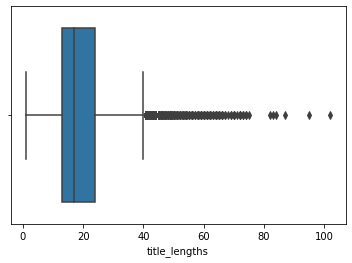

In [53]:
sns.boxplot(df['title_lengths'])

According to the box plot title_lengths is having some outliers.Minimum count=1,Maximum count=102.

<AxesSubplot:xlabel='text_length'>

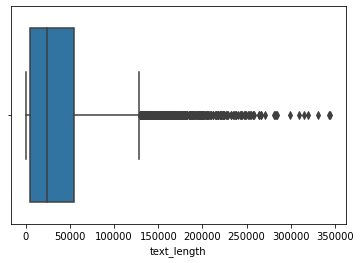

In [54]:
sns.boxplot(df['text_length'])

According to the box plot text_lengths is having some outliers.Minimum count=17,Maximum count=344772.

<AxesSubplot:xlabel='section count'>

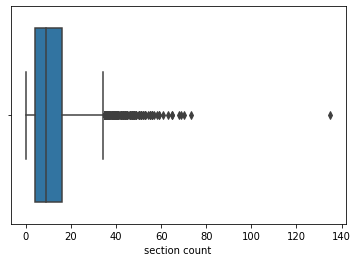

In [55]:
sns.boxplot(df['section count'])

According to the box plot section count is having some outliers.Minimum count=0,Maximum count=135.

<AxesSubplot:xlabel='reference count'>

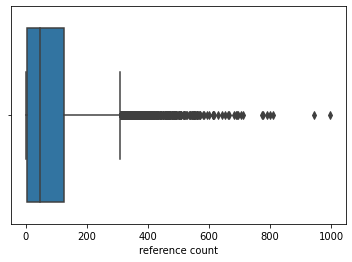

In [57]:
sns.boxplot(df['reference count'])

According to the box plot reference count is having some outliers.Minimum count=0,Maximum count=997.

<AxesSubplot:xlabel='num_headings'>

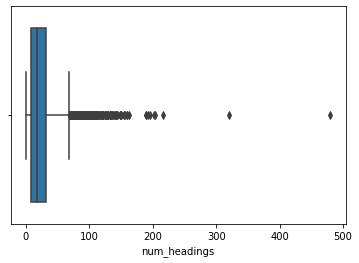

In [58]:
sns.boxplot(df['num_headings'])

According to the box plot no of headings is having some outliers.Minimum count=0,Maximum count=480.

<AxesSubplot:xlabel='num_citations'>

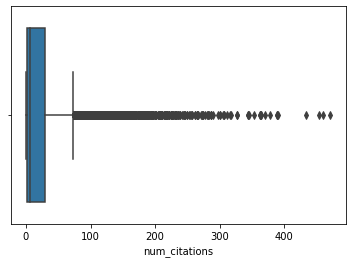

In [59]:
sns.boxplot(df['num_citations'])

According to the box plot no of citations is having some outliers.Minimum count=0,Maximum count=471.

<AxesSubplot:xlabel='num_images'>

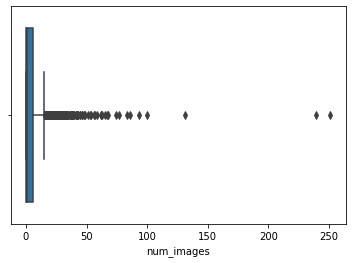

In [60]:
sns.boxplot(df['num_images'])

According to the box plot no of images is having some outliers.Minimum count=0,Maximum count=251.

<AxesSubplot:xlabel='num_external_links'>

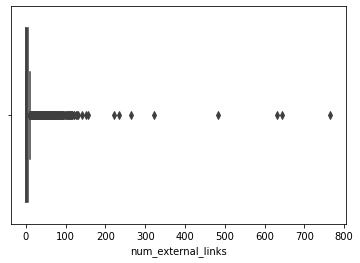

In [62]:
sns.boxplot(df['num_external_links'])

According to the box plot no of reference links is having some outliers.Minimum count=0,Maximum count=765.

<AxesSubplot:xlabel='article_age'>

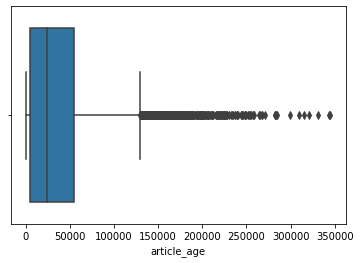

In [63]:
sns.boxplot(df['article_age'])

# # Explanatory Data Analysis

**1.Distribution of features**

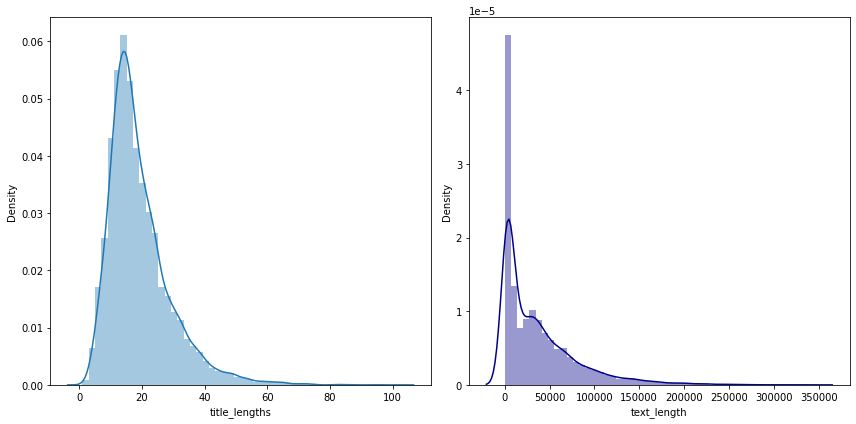

In [64]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['title_lengths'])
plt.subplot(1,2,2)
sns.distplot(df['text_length'],color = 'darkblue')
plt.tight_layout()

1.The maximum title length lies below 60and some values are dispersed and max value upto 120

2.The title length is mostly distributed between 0 and 170000

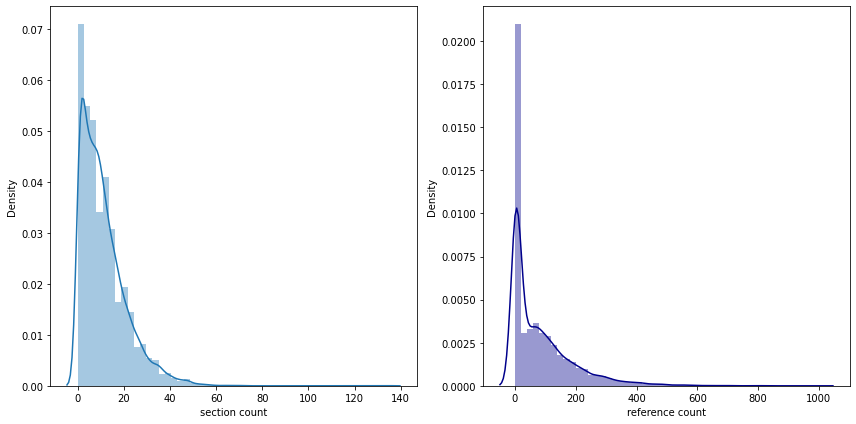

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['section count'])
plt.subplot(1,2,2)
sns.distplot(df['reference count'],color = 'darkblue')
plt.tight_layout()

1.The maximum section count is below 60 and some values are dispersed and max value upto 140

2.The reference count is mostly distributed between 0 and 500

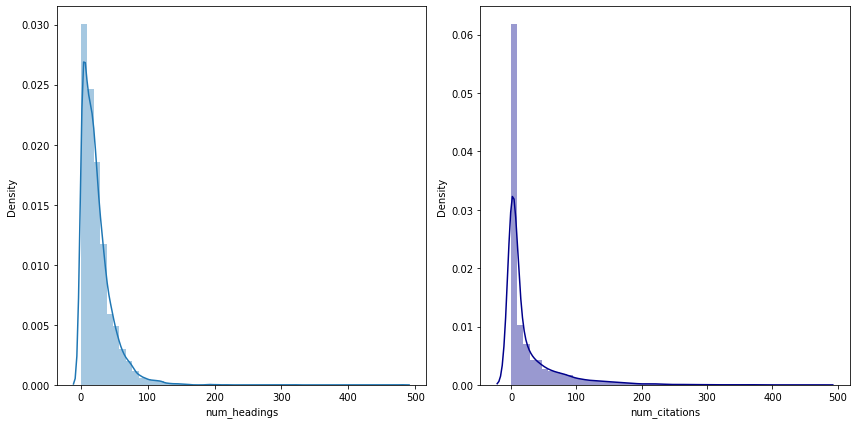

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['num_headings'])
plt.subplot(1,2,2)
sns.distplot(df['num_citations'],color = 'darkblue')
plt.tight_layout()

1.The no of headings is below  120 and some values are dispersed and max value upto 480

2.The reference count is mostly distributed between 0 and 200

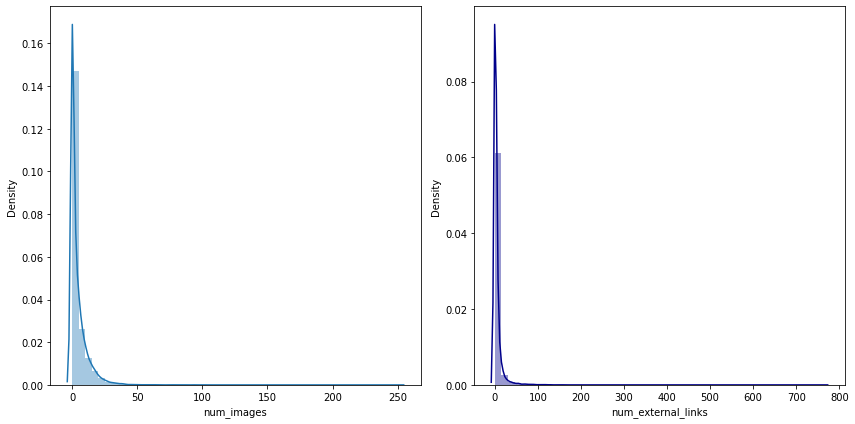

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['num_images'])
plt.subplot(1,2,2)
sns.distplot(df['num_external_links'],color = 'darkblue')
plt.tight_layout()

1.The no of images is below  50 and some values are dispersed and max value upto 271

2.The external links is mostly distributed between 0 and 100

# **FEATURE VS TARGET **

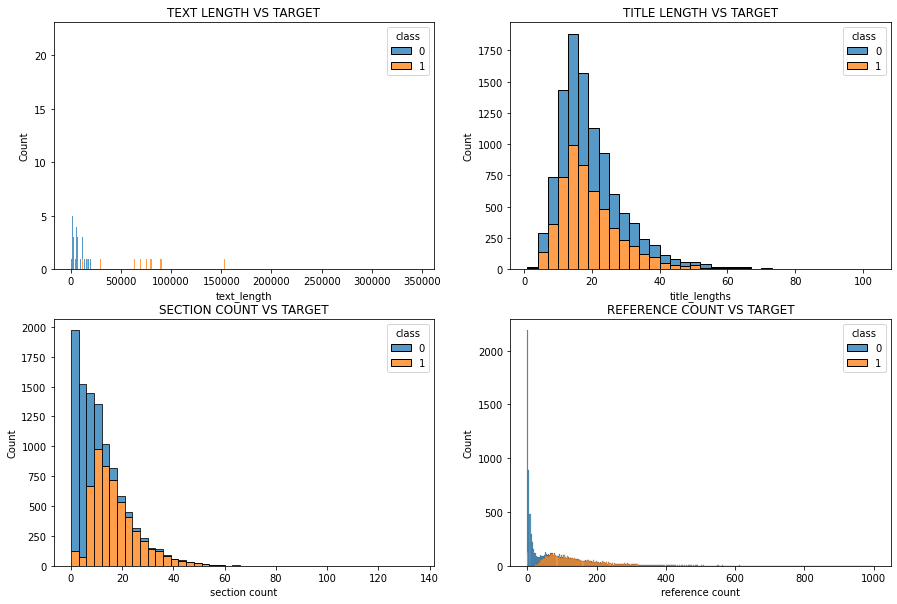

<Figure size 432x288 with 0 Axes>

In [70]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=df, x="text_length", hue="class", multiple="stack",binwidth=3)
plt.title('TEXT LENGTH VS TARGET')

plt.subplot(222)
sns.histplot(data=df, x="title_lengths", hue="class", multiple="stack",binwidth=3)
plt.title('TITLE LENGTH VS TARGET')

plt.subplot(223)
sns.histplot(data=df, x="section count", hue="class", multiple="stack",binwidth=3)
plt.title('SECTION COUNT VS TARGET')

plt.subplot(224)
sns.histplot(data=df, x="reference count", hue="class", multiple="stack",binwidth=3)
plt.title('REFERENCE COUNT VS TARGET')

plt.show()
plt.tight_layout()

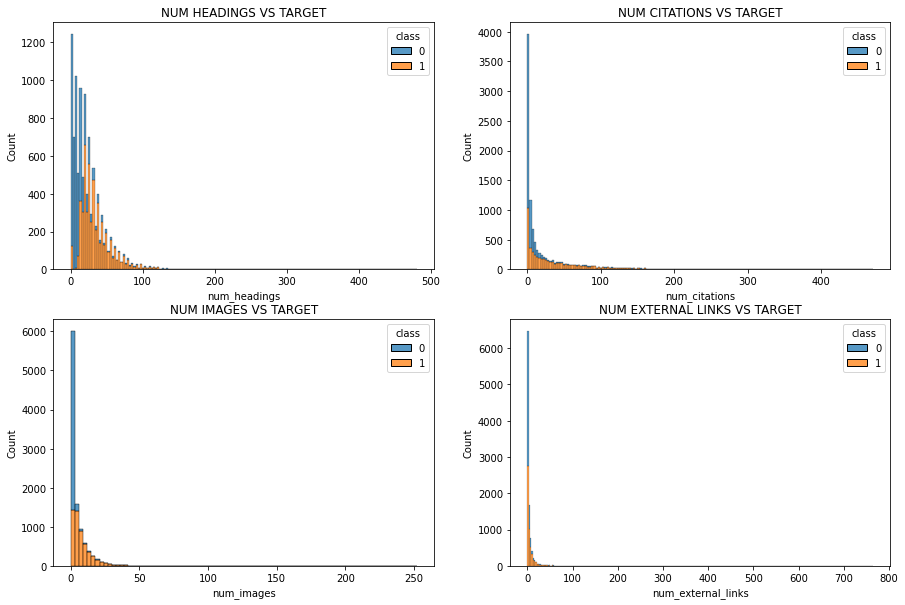

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=df, x="num_headings", hue="class", multiple="stack",binwidth=3)
plt.title('NUM HEADINGS VS TARGET')

plt.subplot(222)
sns.histplot(data=df, x="num_citations", hue="class", multiple="stack",binwidth=3)
plt.title('NUM CITATIONS VS TARGET')

plt.subplot(223)
sns.histplot(data=df, x="num_images", hue="class", multiple="stack",binwidth=3)
plt.title('NUM IMAGES VS TARGET')

plt.subplot(224)
sns.histplot(data=df, x="num_external_links", hue="class", multiple="stack",binwidth=3)
plt.title('NUM EXTERNAL LINKS VS TARGET')

plt.show()
plt.tight_layout()

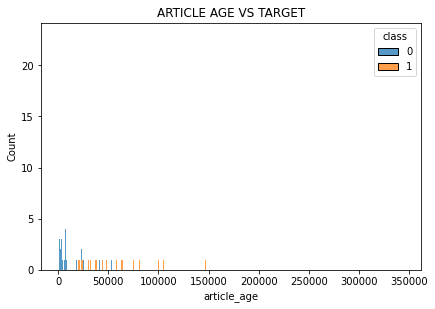

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=df, x="article_age", hue="class", multiple="stack",binwidth=3)
plt.title('ARTICLE AGE VS TARGET')


plt.show()
plt.tight_layout()

1.FROM TITLE LENGTH VS TARGET When the title_length is high the article seems to be Non featured article.

2.FROM TEXT LENGTH VS TARGET  When the text length is high the articles seems to be featured article.

3.FROM SECTION COUNT VS TARGET , When the section counts are high the article seems to be FEATURED ARTICLE

4.FROM RFERENCE COUNT VS TARGET , When the no of references increases there are high chances of article to be featured one.

5.FROM  HEADINGS VS TARGET ,The heading count seem to play a role in predicting feature of article.

6.FROM IMAGES VS TARGET , When the Images are high,the article seems to be featured article.

7.FROM CITATIONS VS TARGET , When the citations are low,the article seems to be  non featured article.

8.FROM EXTERNAL LINKS VS TARGET , The external links doesnt seem to play a role in predicting the article as featured or not.

# **FEATURE ANALYSIS**

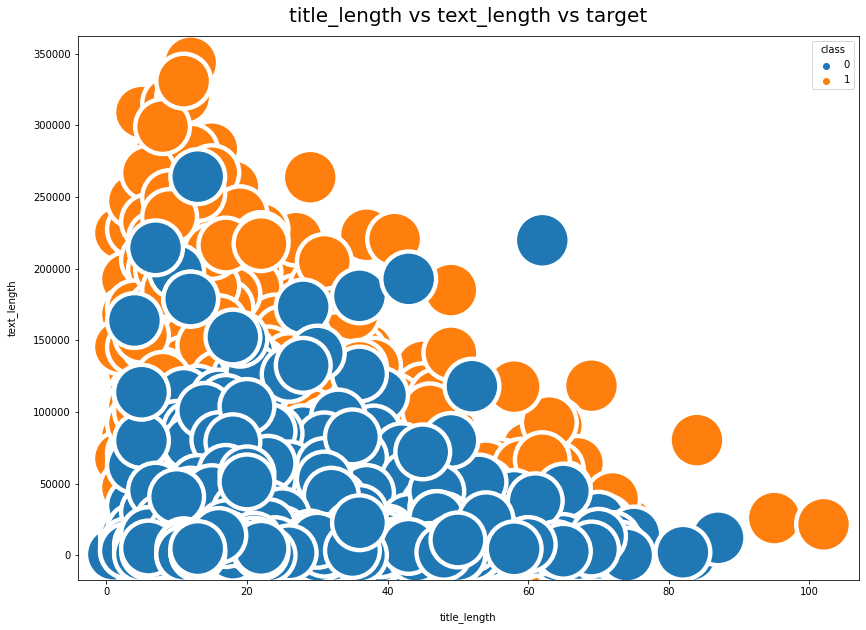

In [162]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.scatterplot(x='title_lengths', y='text_length', hue='class', data=df, s=3000)
plt.title("title_length vs text_length vs target", y=1.015, fontsize=20)
plt.xlabel("title_length", labelpad=15)
plt.ylabel("text_length", labelpad=15)
ax = plt.gca()

When the text length is high  article is featured and when title lenght is low article is Non Featured.The text length does play an  important role.

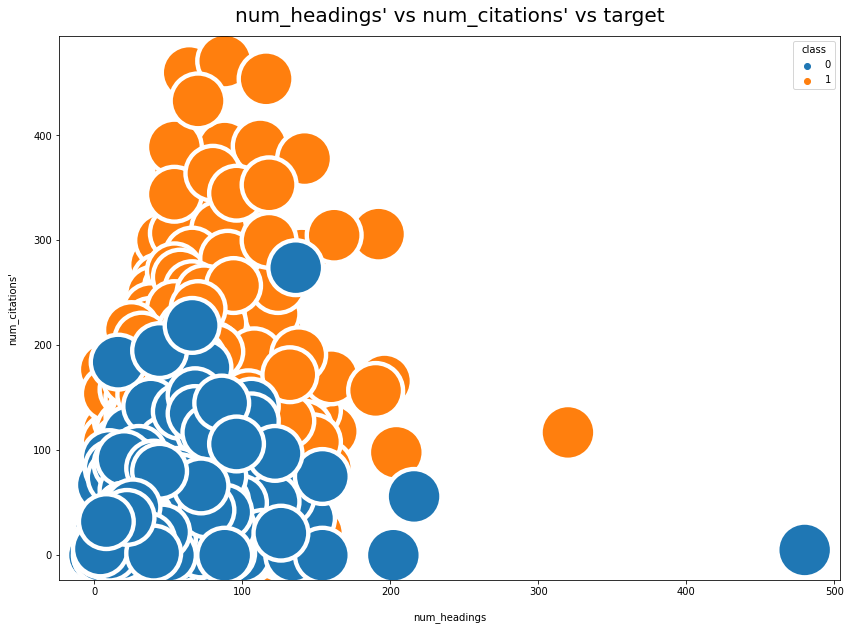

In [163]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.scatterplot(x='num_headings', y='num_citations', hue='class', data=df, s=3000)
plt.title("num_headings' vs num_citations' vs target", y=1.015, fontsize=20)
plt.xlabel("num_headings", labelpad=15)
plt.ylabel("num_citations'", labelpad=15)
ax = plt.gca()

When the no of citations are high and when no of headings are  low articles are featured article.

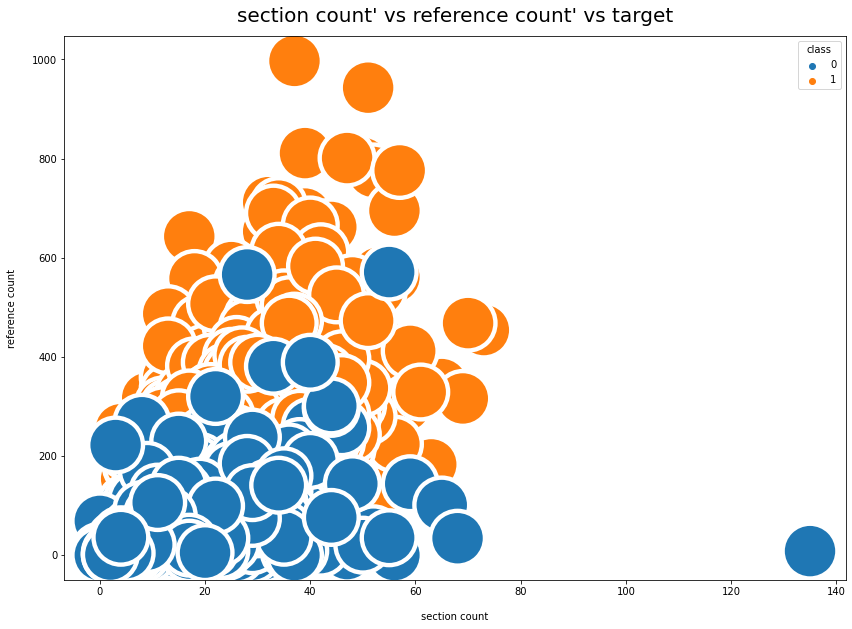

In [164]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.scatterplot(x='section count', y='reference count', hue='class', data=df, s=3000)
plt.title("section count' vs reference count' vs target", y=1.015, fontsize=20)
plt.xlabel("section count", labelpad=15)
plt.ylabel("reference count", labelpad=15)
ax = plt.gca()

When the no of references are high and when no of section are low articles are featured article.

CORRELATION MATRIX

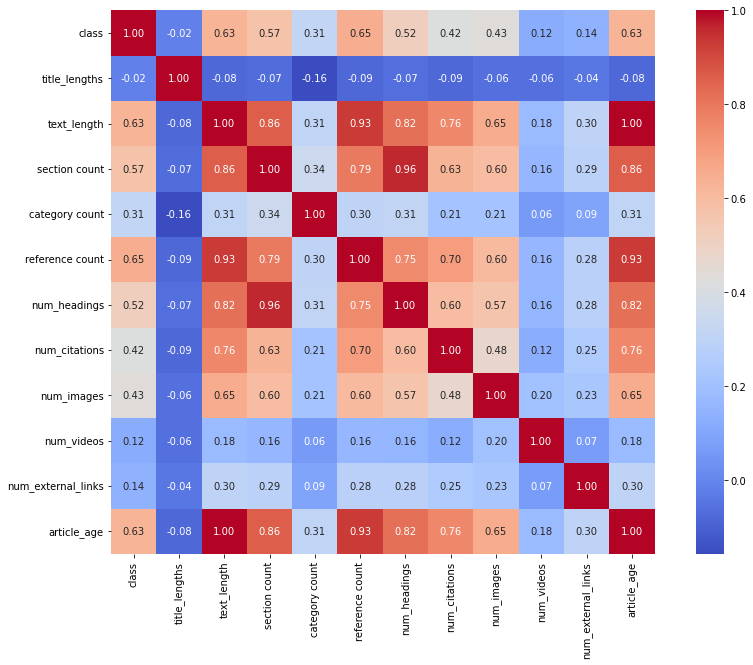

In [83]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.show()

# TARGET AND FEATURE SELECTION

In [137]:
X = df.drop(['class','category count', 'reference count', 'num_headings', 'num_citations',
       'num_images', 'num_videos', 'num_external_links','article_age','title_lengths','section count'],axis=1)
y = df['class'].values

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [135]:
X_train

,text_length,section count
5981442,1168.0,1.0
4870799,25795.0,11.0
3316186,53456.0,21.0
1680777,148012.0,37.0
101537,104708.0,26.0
...,...,...
4155615,6454.0,8.0
5567685,74443.0,12.0
3788961,22914.0,10.0
954753,13189.0,6.0


# Making the data balanced

# 1.SMOTE

In [146]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [147]:
import collections, numpy
counter = collections.Counter(y_sm)
counter


Counter({0: 4338, 1: 4338})

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)    

0.9094052558782849

# 2.SMOTEENN

In [139]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train, y_train) 

In [140]:
import collections, numpy
counter = collections.Counter(y_smt)
counter


Counter({0: 3580, 1: 3228})

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_smt,y_smt)
lr3.score(X_smt,y_smt)
     

0.9973560517038778

To balance the data:

1.SMOTE, the model score is 90.94%.

2.SMOTE + Tomek, the model score is 99.73%.

Here we got the best score from SMOTE + Tomek which is 99.73%.

Now,We gonna use SMOTE + Tomek technique to build the models

# 1.LOGISTIC REGRESSION

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
clf = LogisticRegression()

# Fit the model on training data
clf.fit(X_smt,y_smt)

# Make predictions on training data
train_preds = clf.predict(X_smt)

# Calculate training accuracy
train_acc = accuracy_score(y_smt, train_preds)

# Make predictions on testing data
test_preds = clf.predict(X_test)

# Calculate testing accuracy
test_acc = accuracy_score(y_test, test_preds)

print('Training Accuracy:', train_acc)
print('Testing Accuracy:', test_acc)

Training Accuracy: 0.9973560517038778
Testing Accuracy: 0.9188926663428849


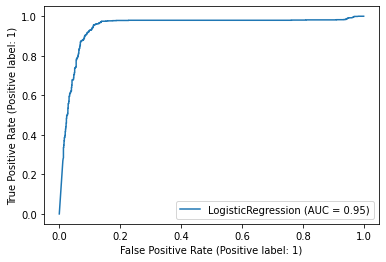

In [143]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

# **2.SVM classifer**

In [144]:
# Import the necessary libraries
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an SVM classifier object
clf = svm.SVC(kernel='linear')

# Fit the classifier to the training data
clf.fit(X_smt, y_smt)

# Predict the classes of the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9208353569694027


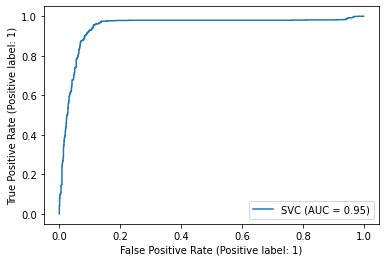

In [145]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

# 3.XG Boost Classifier

In [87]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Build the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
model.fit(X_smt,y_smt)

# Predict the labels for the test set
y_pred = model.predict(X_test)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("F1 score: ", f1)
print("Confusion Matrix: \n", matrix)
print("classification_report",report)

Accuracy:  0.9290917921321029
F1 score:  0.9290243203953986
Confusion Matrix: 
 [[924 104]
 [ 42 989]]
classification_report               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1028
           1       0.90      0.96      0.93      1031

    accuracy                           0.93      2059
   macro avg       0.93      0.93      0.93      2059
weighted avg       0.93      0.93      0.93      2059



In [94]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.9461022969452996
Learning rate :  0.02  Cross-Val score :  0.9495003551977266
Learning rate :  0.03  Cross-Val score :  0.9475562396400662
Learning rate :  0.04  Cross-Val score :  0.9485318493961639
Learning rate :  0.05  Cross-Val score :  0.949017286289368
Learning rate :  0.1  Cross-Val score :  0.9470755387165521
Learning rate :  0.11  Cross-Val score :  0.9485318493961639
Learning rate :  0.12  Cross-Val score :  0.9475609756097562
Learning rate :  0.13  Cross-Val score :  0.9460999289604548
Learning rate :  0.14  Cross-Val score :  0.9475609756097562
Learning rate :  0.15  Cross-Val score :  0.9475609756097562
Learning rate :  0.2  Cross-Val score :  0.9465924698081933
Learning rate :  0.5  Cross-Val score :  0.9465877338385035
Learning rate :  0.7  Cross-Val score :  0.944160549372484
Learning rate :  1  Cross-Val score :  0.9436727444944353


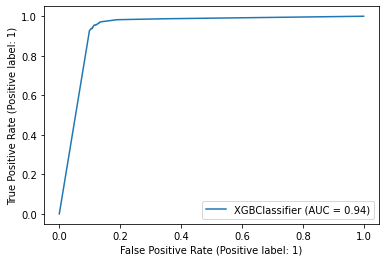

In [149]:
from sklearn.metrics import RocCurveDisplay  
model = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)  

# **4.Random Forest Classifier**

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_smt,y_smt)

RandomForestClassifier(random_state=0)

In [151]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

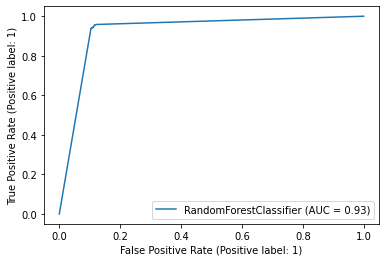

In [152]:
from sklearn.metrics import RocCurveDisplay 
svc_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test)  

# 5.Decision Tree classifier

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [154]:
dtc=DecisionTreeClassifier()
dtc.fit(X_smt,y_smt) 
print(dtc.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dtc.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.916424498145052


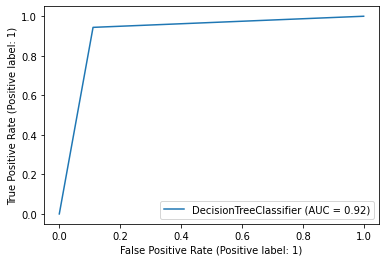

In [155]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test)

In [98]:
from sklearn.metrics import RocCurveDisplay,accuracy_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.9969222160044767  Cross val score :  0.9305659483779305
Depth  :  2  Training Accuracy :  0.9977616116396195  Cross val score :  0.9305659483779305
Depth  :  3  Training Accuracy :  0.9983212087297146  Cross val score :  0.9339616386455127
Depth  :  4  Training Accuracy :  0.998740906547286  Cross val score :  0.9354226852948141
Depth  :  5  Training Accuracy :  0.9993005036373811  Cross val score :  0.9393061804404452
Depth  :  6  Training Accuracy :  0.9995803021824287  Cross val score :  0.9393038124556004
Depth  :  7  Training Accuracy :  0.9998601007274762  Cross val score :  0.9363959270660669
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.9359057542031731
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.9320246270423869
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.924738337674639
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.920854842529008
Depth  :  40  Training Accuracy :  1.0  Cross val

In [156]:
dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(X_smt,y_smt) 
print(dtc.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dtc.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.916424498145052


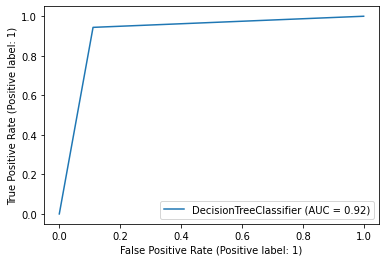

In [157]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test)

# **FEATURE IMPORTANCE OF ALL MODELS**

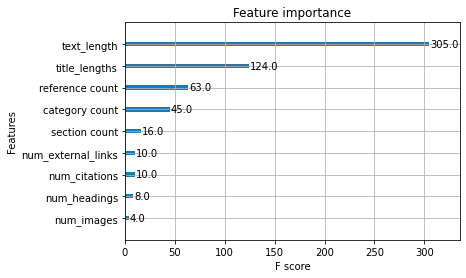

In [111]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [105]:
importance = rf_model.feature_importances_
list(zip(importance,[  'title_lengths', 'text_length', 'section count',
       'category count', 'reference count', 'num_headings', 'num_citations',
       'num_images', 'num_videos', 'num_external_links', 'article_age'
       ]))

[(0.0014472931748294043, 'title_lengths'),
 (0.21655280950969288, 'text_length'),
 (0.13099047560949614, 'section count'),
 (0.001369697434341292, 'category count'),
 (0.23074526576723908, 'reference count'),
 (0.06398973512208246, 'num_headings'),
 (0.011008994371909999, 'num_citations'),
 (0.036220240128075475, 'num_images'),
 (7.8715877616161e-06, 'num_videos'),
 (0.0002532718668830719, 'num_external_links'),
 (0.3074143454276887, 'article_age')]

In [107]:
importance = dtc.feature_importances_
list(zip(importance,[  'title_lengths', 'text_length', 'section count',
       'category count', 'reference count', 'num_headings', 'num_citations',
       'num_images', 'num_videos', 'num_external_links', 'article_age'
       ]))

[(0.0009133080699887218, 'title_lengths'),
 (0.993749438912034, 'text_length'),
 (0.0, 'section count'),
 (0.0005607537384576551, 'category count'),
 (0.003925064908466294, 'reference count'),
 (0.0, 'num_headings'),
 (0.0, 'num_citations'),
 (0.0, 'num_images'),
 (0.0, 'num_videos'),
 (0.0, 'num_external_links'),
 (0.000851434371053214, 'article_age')]

# **SOLUTION STATEMENT:**


# **Modelling**

Models are tested to see which one can better predict Article as Featured or Unfeatured

1.LOGISTIC REGRESSION, the model accuracy score is 0.95

2.DECISION TREE with max depth, the model accuracy is 0.92

3.SVM, the model accuracy score is 0.95

4.RANDOM FOREST, the model Accuracy score is 0.93

5.XG BOOST CLASSIFIER, the model Accuracy score is 0.94

The model SVM and Logistic Regression has the highest Accuracy score, coming in at 0.95

# **INTERPRETATIONS**

1.Based on the feature importance of models,text length plays an important role in predicting the article as Featured or Unfeatured.

2.Both the SVM and logistic regression model provides same AUROC score.

3.Only single feature can provide upto 0.95 Accuracy score.The important features are Text length,Title length and Section count